# Importing the data and Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

data=pd.read_csv("Cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Observing the data and checking out null values

In [ ]:
data=data.iloc[:,1:-1]
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Encoding Categorical Variables.

In [3]:
print(data['diagnosis'].value_counts())
mapping={
    'B':0,
    'M':1
}

data['diagnosis']=data['diagnosis'].map(mapping)


diagnosis
B    357
M    212
Name: count, dtype: int64


# Standardizing the Data

In [4]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# SVM

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = ['scale', 0.001, 0.01, 0.1, 1]

best_recall = 0
best_C = None
best_gamma = None
best_model = None
best_kernel = None

for kernel in ['linear', 'rbf']:
    for C in C_values:
        if kernel == 'linear':
            model = SVC(kernel=kernel, C=C, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_valid)
            recall = recall_score(y_valid, y_pred)
            if recall > best_recall:
                best_recall = recall
                best_C = C
                best_gamma = None
                best_model = model
                best_kernel = kernel
        else:
            for gamma in gamma_values:
                model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_valid)
                recall = recall_score(y_valid, y_pred)

                if recall > best_recall:
                    best_recall = recall
                    best_C = C
                    best_gamma = gamma
                    best_model = model
                    best_kernel = kernel
print("Best Model:")
print(f"Kernel: {best_kernel}")
print(f"C: {best_C}")
if best_gamma:
    print(f"Gamma: {best_gamma}")
print(f"Validation Recall: {best_recall:.4f}")

X_train_valid = np.vstack((X_train, X_valid))
y_train_valid = np.concatenate((y_train, y_valid))

cv_scores = cross_val_score(best_model, X_train_valid, y_train_valid, cv=5, scoring='recall')
print(f"5-Fold CV Recall on Train+Valid: {cv_scores.mean():.4f}")



Best Model:
Kernel: rbf
C: 100
Gamma: scale
Validation Recall: 0.9535
5-Fold CV Recall on Train+Valid: 0.9647


In [11]:
y_test_pred = best_model.predict(X_test)
test_recall = recall_score(y_test, y_test_pred)
print(f"Test Recall: {test_recall:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Recall: 0.9524
Confusion Matrix:
[[70  2]
 [ 2 40]]


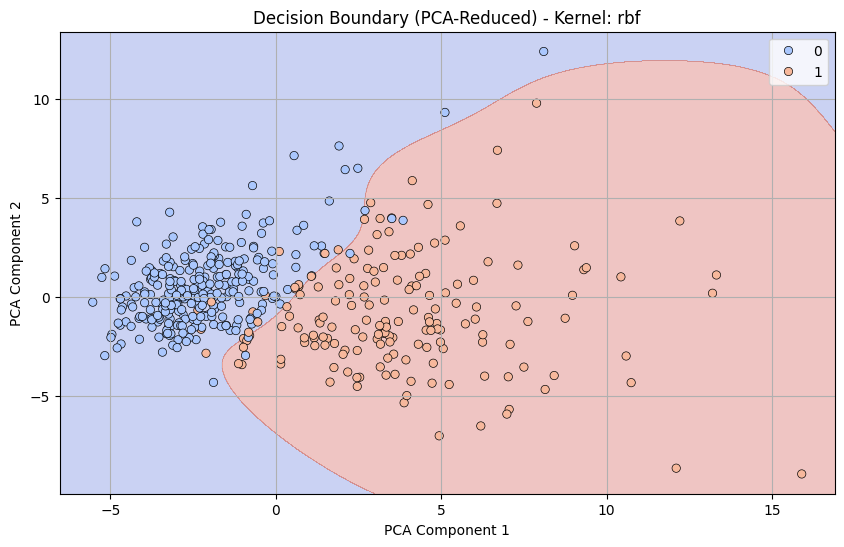

In [12]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

if best_kernel == 'rbf':
    model_vis = SVC(kernel=best_kernel, C=best_C, gamma=best_gamma)
else:
    model_vis = SVC(kernel=best_kernel, C=best_C)

model_vis.fit(X_train_pca, y_train)

# Combine for boundary visualization
X_vis = np.vstack((X_train_pca, X_valid_pca))
y_vis = np.concatenate((y_train, y_valid))

h = 0.01
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_vis, palette='coolwarm', edgecolor='k')
plt.title(f"Decision Boundary (PCA-Reduced) - Kernel: {best_kernel}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
